In [1]:
import numpy as np

x_train = np.linspace(-3, 3, num=50)
y_train = np.cos(x_train) + np.random.normal(0, 0.1, size=50)
x_train = x_train.astype(np.float32).reshape((50, 1))
y_train = y_train.astype(np.float32).reshape((50, 1))

In [2]:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

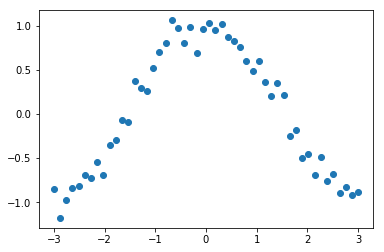

In [3]:
plt.plot(x_train, y_train, 'o')

In [5]:
import tensorflow as tf
from edward.models import Normal

W_0 = Normal(loc=tf.zeros([1, 2]), scale=tf.ones([1, 2]))
W_1 = Normal(loc=tf.zeros([2, 1]), scale=tf.ones([2, 1]))
b_0 = Normal(loc=tf.zeros(2), scale=tf.ones(2))
b_1 = Normal(loc=tf.zeros(1), scale=tf.ones(1))

x = x_train
y = Normal(loc=tf.matmul(tf.tanh(tf.matmul(x, W_0) + b_0), W_1) + b_1,
           scale=0.1)

def fun(x, w0, b0, w1, b1):
    return np.

In [6]:
qW_0 = Normal(loc=tf.Variable(tf.zeros([1, 2])),
              scale=tf.nn.softplus(tf.Variable(tf.zeros([1, 2]))))
qW_1 = Normal(loc=tf.Variable(tf.zeros([2, 1])),
              scale=tf.nn.softplus(tf.Variable(tf.zeros([2, 1]))))
qb_0 = Normal(loc=tf.Variable(tf.zeros(2)),
              scale=tf.nn.softplus(tf.Variable(tf.zeros(2))))
qb_1 = Normal(loc=tf.Variable(tf.zeros(1)),
              scale=tf.nn.softplus(tf.Variable(tf.zeros(1))))

In [7]:
import edward as ed

inference = ed.KLqp({W_0: qW_0, b_0: qb_0,
                     W_1: qW_1, b_1: qb_1}, data={y: y_train})
inference.run(n_iter=1000)

1000/1000 [100%] ██████████████████████████████ Elapsed: 3s | Loss: -7.418
